# Linear Programming: A Blending Problem
- Author: Siang Lim, March 2nd 2022
- Adapted from https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html

# 1. Optimal production of cat food

Whiskas cat food is manufactured by Uncle Ben’s (Mars Inc.)

As a corporation, the manufacturer wants to maximize profits by 

- producing cat food as cheaply as possible,
- while meeting the stated product specifications and obligations to their furry customers and shareholders.

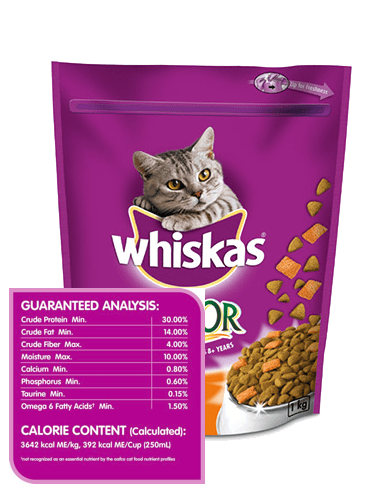

The manufacturers must vary the quantities of each ingredient used (e.g. chicken, beef, mutton, rice, wheat and gel) but operate within the constraints defined for nutritional standards (e.g. minimum protein specs, maximum fibre specs).

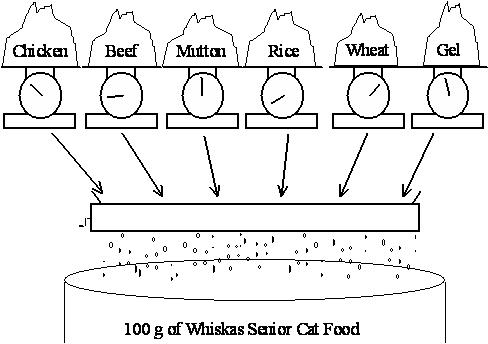

To figure out what proportions of ingredients to use, we can formulate this as a linear programming (LP) problem.

### Assumptions
The costs for raw ingredients are (per gram):

| Stuff   | Costs    |
|---------|----------|
| chicken | \\$0.013 |
| beef    | \\$0.008 |
| mutton  | \\$0.010 |
| rice    | \\$0.002 |
| wheat   | \\$0.005 |
| gel     | \\$0.001 |

The ingredients have the following nutritional values (per gram):

| Stuff      | Protein | Fat   | Fibre | Salt  |
|------------|---------|-------|-------|-------|
| chicken    | 0.100   | 0.080 | 0.001 | 0.002 |
| beef       | 0.200   | 0.100 | 0.005 | 0.005 |
| rice       | 0.000   | 0.010 | 0.100 | 0.002 |
| wheat      | 0.040   | 0.010 | 0.150 | 0.008 |

Product specs (% per gram):

| Spec    | Constraint   |
|---------|--------------|
| protein | $\geq 8.0\%$ |
| fat     | $\geq 6.0\%$ |
| fibre   | $\leq 2.0\%$ |
| salt    | $\leq 0.4\%$ |

# 2. A simplified problem
To simplify the problem, let's assume that Whiskas only has 2 ingredients, chicken and beef. Our job is to figure out what how much chicken and beef to use based on its costs and nutritional values.

### Setting up the problem
Our decision variables are:
- $x_1$, percentage (%) of chicken in a 100g bag of Whiskas
- $x_2$, percentage (%) of beef in a 100g bag of Whiskas

The objective function is defined as finding values of $x_1$ and $x_2$ such that the costs are minimized:

$$\min_{x_1, x_2} f(x_1, x_2) = 0.013 x_1 + 0.008 x_2$$

The objective function is subject to the following contraints.

First, the variables must sum up to 100, since they are percentages.

$$ x_1 + x_2 = 100 $$

Second, the Whiskas product specs must be met:

$$
\begin{align}
0.100 x_1 + 0.200 x_2 \geq 8.0\% & \quad \text{(protein)} \\
0.080 x_1 + 0.100 x_2 \geq 6.0\% & \quad \text{(fat)} \\
0.001 x_1 + 0.005 x_2 \leq 2.0\% & \quad \text{(fibre)} \\
0.002 x_1 + 0.005 x_2 \leq 0.4\% & \quad \text{(salt)}
\end{align}
$$

# 2.1 Visualizing the problem
We can use a 2D plot to visualize this LP problem

In [308]:
# Just importing libraries and tweaking the plot settings
import numpy as np
import matplotlib.pyplot as plt
fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

### Visualizing inequalities
Let's see what the first protein constraint looks like on a $x_2$ vs. $x_1$ plot.

The protein constraint is an inequality, where the sum of proportions of x and y must be greater than a certain value:

```
c1 = 0.100*x+0.200*y>=8.0 #protein
```

We can rearrange the inequality in terms of y to get the equation of the line
```
y_c1 = (8 - 0.1*d)/0.20
```

As shown below, the inequality is represented by the shaded region above that line.

Text(0, 0.5, '$x_2$')

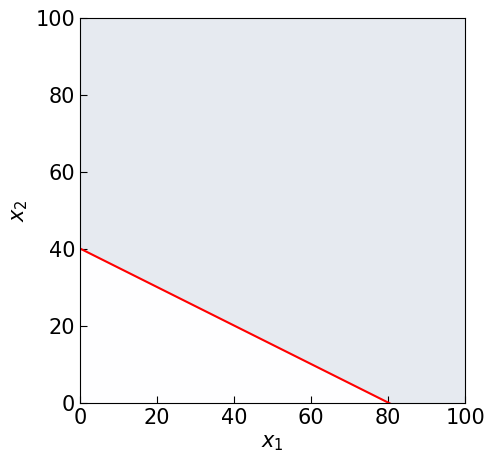

In [309]:
# %matplotlib inline
d = np.linspace(0, 100, 1000)
x,y = np.meshgrid(d,d)

# constraint formulation in terms of x and y
c1 = 0.100*x+0.200*y>=8.0 #protein
c2 = 0.080*x+0.100*y>=6.0 #fat
c3 = 0.001*x+0.005*y<=2.0 #fibre
c4 = 0.002*x+0.005*y<=0.4 #salt
c0 = x + y == 100 # proportions

# equation of a line, y = mx + c
y_c1 = (8 - 0.1*d)/0.20
y_c2 = (6 - 0.08*d)/0.10
y_c3 = (2 - 0.001*d)/0.005
y_c4 = (0.4 - 0.002*d)/0.005
y_c0 = 100 - d

plt.figure(figsize=(5, 5))
plt.imshow((c1).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.plot(d, y_c1, '-r');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

Now add in the fat constraint

Text(0, 0.5, '$x_2$')

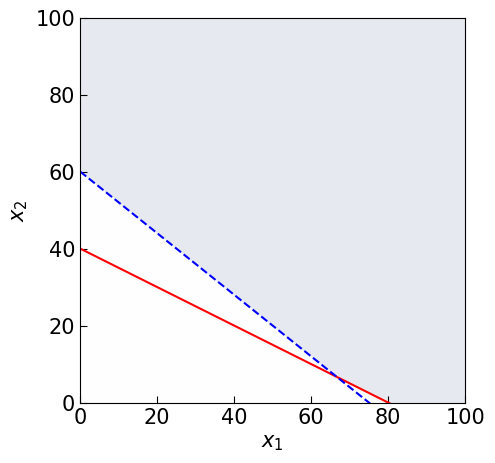

In [310]:
plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

Now the fibre constraint, noticed that nothing showed up. Why?

Text(0, 0.5, '$x_2$')

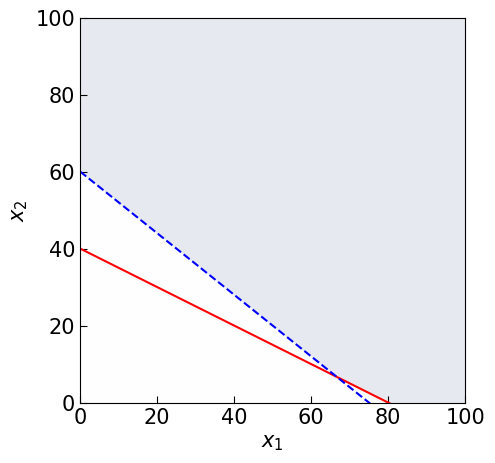

In [311]:
plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2 & c3).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.plot(d, y_c3, '-.o');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

This is because the constraint is off the chart and really far away! We can see this by zooming out (set ylim to 500).

Text(0, 0.5, '$x_2$')

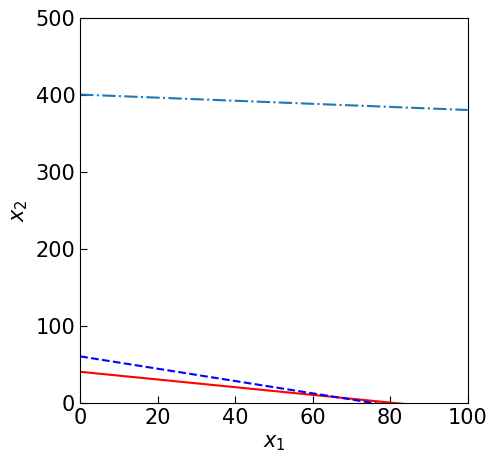

In [312]:
plt.figure(figsize=(5, 5))
plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.plot(d, y_c3, '-.');
plt.xlim((0, 100))
plt.ylim((0, 500))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

Now throw in the salt constraint

Text(0, 0.5, '$x_2$')

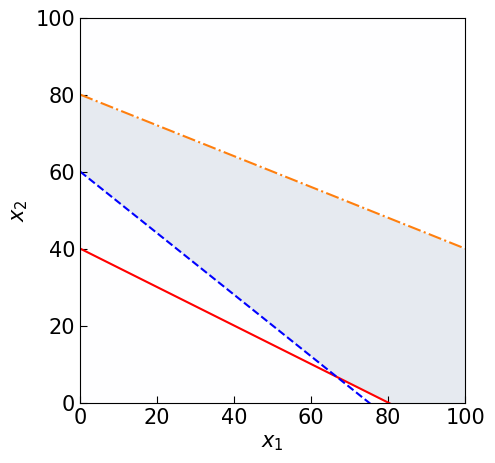

In [313]:
plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2 & c3 & c4).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.plot(d, y_c3, '-.');
plt.plot(d, y_c4, '-.');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

### Isoprofit and isocost lines

Recall that the objective function is defined as finding values of $x_1$ and $x_2$ such that the costs are minimized:

$$\min_{x_1, x_2} f(x_1, x_2) = 0.013 x_1 + 0.008 x_2$$

So we know that $f$ here represents a cost based on the proportions of chicken and beef used.

We can represent this function as a family of lines with a constant $Z$:

$$
0.013 x_1 + 0.008 x_2 = Z
$$

For example, there may be a combination of $x_1$ and $x_2$, such that the total cost, $Z$

is \$5:

$$
0.013 x_1 + 0.008 x_2 = 5
$$

or \$1:

$$
0.013 x_1 + 0.008 x_2 = 1
$$

or \$2.50:

$$
0.013 x_1 + 0.008 x_2 = 2.50
$$

and so on... let's plot a few of these lines

Text(67, 87, 'Lower Costs')

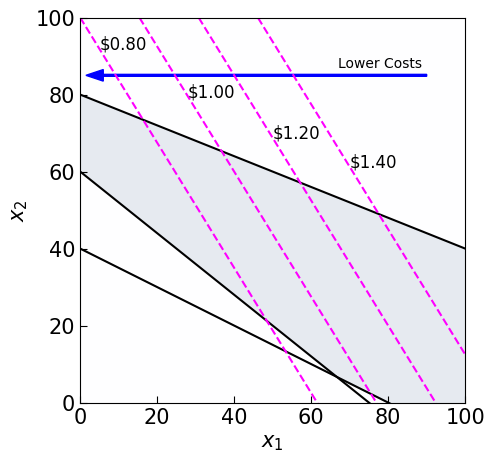

In [314]:
y_obj1 = (1 - 0.013*d)/0.008
y_obj2 = (1.20 - 0.013*d)/0.008
y_obj3 = (0.80 - 0.013*d)/0.008
y_obj4 = (1.40 - 0.013*d)/0.008

plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2 & c3 & c4).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.plot(d, y_c1, '-k');
plt.plot(d, y_c2, '-k');
plt.plot(d, y_c3, '-k');
plt.plot(d, y_c4, '-k');
plt.plot(d, y_obj1, '--', color='magenta');
plt.plot(d, y_obj2, '--', color='magenta');
plt.plot(d, y_obj3, '--', color='magenta');
plt.plot(d, y_obj4, '--', color='magenta');

plt.text(d[280], y_obj1[280], '$1.00', fontsize=12)
plt.text(d[500], y_obj2[500], '$1.20', fontsize=12)
plt.text(d[50], y_obj3[50], '$0.80', fontsize=12)
plt.text(d[700], y_obj4[700], '$1.40', fontsize=12)

plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.arrow(90, 85, -84, 0, width = 0.5, color='blue', head_width=3)
plt.text(67, 87, 'Lower Costs', fontsize=10, color='black')

### Throw in the equality constraint
The feasible region collapses onto the intersection of the grey area and the black line.

Text(0, 0.5, '$x_2$')

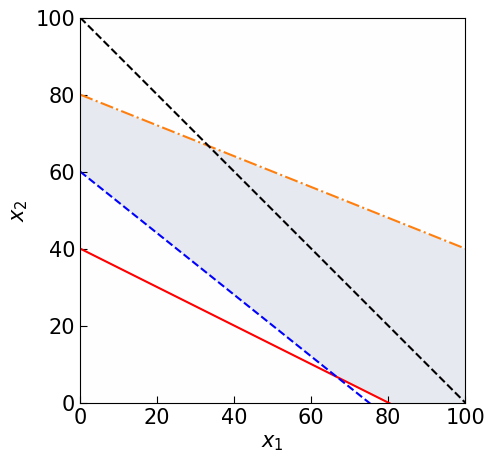

In [315]:
# Make Plot
plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2 & c3 & c4).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);

plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.plot(d, y_c3, '-.');
plt.plot(d, y_c4, '-.');
plt.plot(d, y_c0, '--k');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

### Interpretation of the isocost line
An isocost line tells us that if we operate anywhere on the line, the cost would be the same!
m
To solve the LP problem, we need to find where the lowest cost isocost line intersects with the feasible region...

From the plot below, it seems to be close to $1.00.

Text(0, 0.5, '$x_2$')

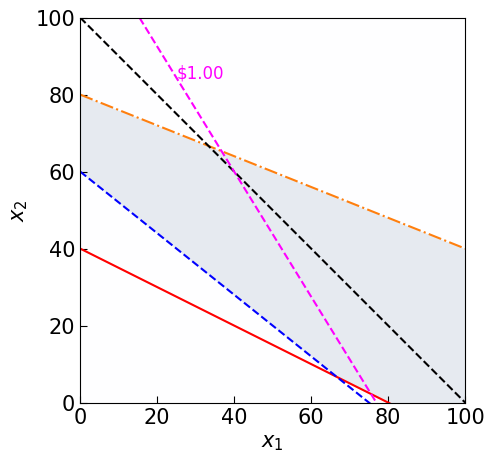

In [316]:
y_obj1 = (1 - 0.013*d)/0.008
# y_obj2 = (1.20 - 0.013*d)/0.008
# y_obj3 = (0.80 - 0.013*d)/0.008
# y_obj4 = (1.40 - 0.013*d)/0.008

# Make Plot
plt.figure(figsize=(5, 5))
plt.imshow((c1 & c2 & c3 & c4).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);

plt.plot(d, y_c1, '-r');
plt.plot(d, y_c2, '--b');
plt.plot(d, y_c3, '-.');
plt.plot(d, y_c4, '-.');
plt.plot(d, y_c0, '--k');

plt.text(d[250], y_obj1[250], '$1.00', fontsize=12, color='magenta')
plt.plot(d, y_obj1, '--', color='magenta');

plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

### Solving for minimum cost
Eyeballing is not good enough, what is the exact intersection point? We'll answer this in the next section.

# 3. Setting up the problem
Now that we've described the problem mathematically and looked at it visually, we can use the `PuLP` library to model the problem and solve for the LP solution.

In [317]:
# Import PuLP modeler functions
from pulp import *

In [318]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The_Whiskas_Problem",LpMinimize)

In [319]:
# The 2 variables Beef and Chicken are created with a lower limit of zero
x1=LpVariable("ChickenPercent",0)
x2=LpVariable("BeefPercent",0)

The variable prob now begins collecting problem data with the += operator. The objective function is logically entered first, with an important comma , at the end of the statement and a short string explaining what this objective function is:

In [320]:
# The objective function is added to 'prob' first
prob += 0.013*x1 + 0.008*x2, "Total cost of ingredients per 100g bag of Whiskas"

The constraints are now entered. This is done with the ‘+=’ operator again, since we are adding more data to the prob variable. The constraint is logically entered after this, with a comma at the end of the constraint equation and a brief description of the cause of that constraint:

In [321]:
# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100*x1 + 0.200*x2 >= 8.0, "ProteinRequirement"
prob += 0.080*x1 + 0.100*x2 >= 6.0, "FatRequirement"
prob += 0.001*x1 + 0.005*x2 <= 2.0, "FibreRequirement"
prob += 0.002*x1 + 0.005*x2 <= 0.4, "SaltRequirement"

Let's save the LP problem we've just defined. Navigate back to the directory and open the file to take a look!

In [322]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

[BeefPercent, ChickenPercent]

### The LP solution
Once we've inputted the data, solving the LP problem is as easy as calling `.solve`.

In [323]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

The integer returned is the LP solver's status. `1` means an optimal solution is found:

In [324]:
LpStatus

{0: 'Not Solved',
 1: 'Optimal',
 -1: 'Infeasible',
 -2: 'Unbounded',
 -3: 'Undefined'}

We can look at the value of the objective function. This tells us the minimum cost required to produce 100g of Whiskas.

Turns out that it's 97 cents, pretty close to the $1 line that we eyeballed.

In [325]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients Per 100g = ", value(prob.objective))

Total Cost of Ingredients Per 100g =  0.9666665000000001


We then inspect the decision variables to find the optimum values for $x_1$ and $x_2$:

In [326]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

BeefPercent = 66.6667
ChickenPercent = 33.3333


Text(0, 0.5, '$x_2$ (Beef %)')

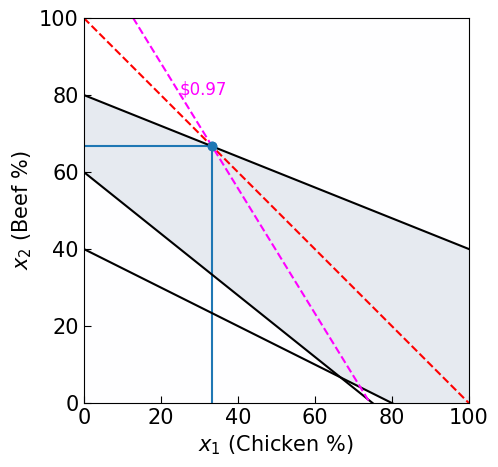

In [327]:
y_obj1 = (0.96667 - 0.013*d)/0.008
# y_obj2 = (1.20 - 0.013*d)/0.008
# y_obj3 = (0.80 - 0.013*d)/0.008
# y_obj4 = (1.40 - 0.013*d)/0.008

# Make Plot
plt.figure(figsize=(5, 5))
plt.plot(d, y_c1, '-k');
plt.plot(d, y_c2, '-k');
plt.plot(d, y_c3, '-k');
plt.plot(d, y_c4, '-k');
plt.plot(d, y_c0, '--r');
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.imshow((c1 & c2 & c3 & c4).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha=0.1);
plt.text(d[250], y_obj1[250], '$0.97', fontsize=12, color='magenta')
plt.plot(d, y_obj1, '--', color='magenta');

plt.stem(33.33, 66.67)
plt.stem(66.67, 33.33, orientation='horizontal')

plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_1$ (Chicken %)')
plt.ylabel(r'$x_2$ (Beef %)')

# 4. Conclusion
Using linear programming, we can now give Uncle Ben's Operations Manager a call and suggest that they manufacture Whiskas using $67\%$ beef and $33\%$ to minimize costs and pay their factory workers more.

<div>
<br>
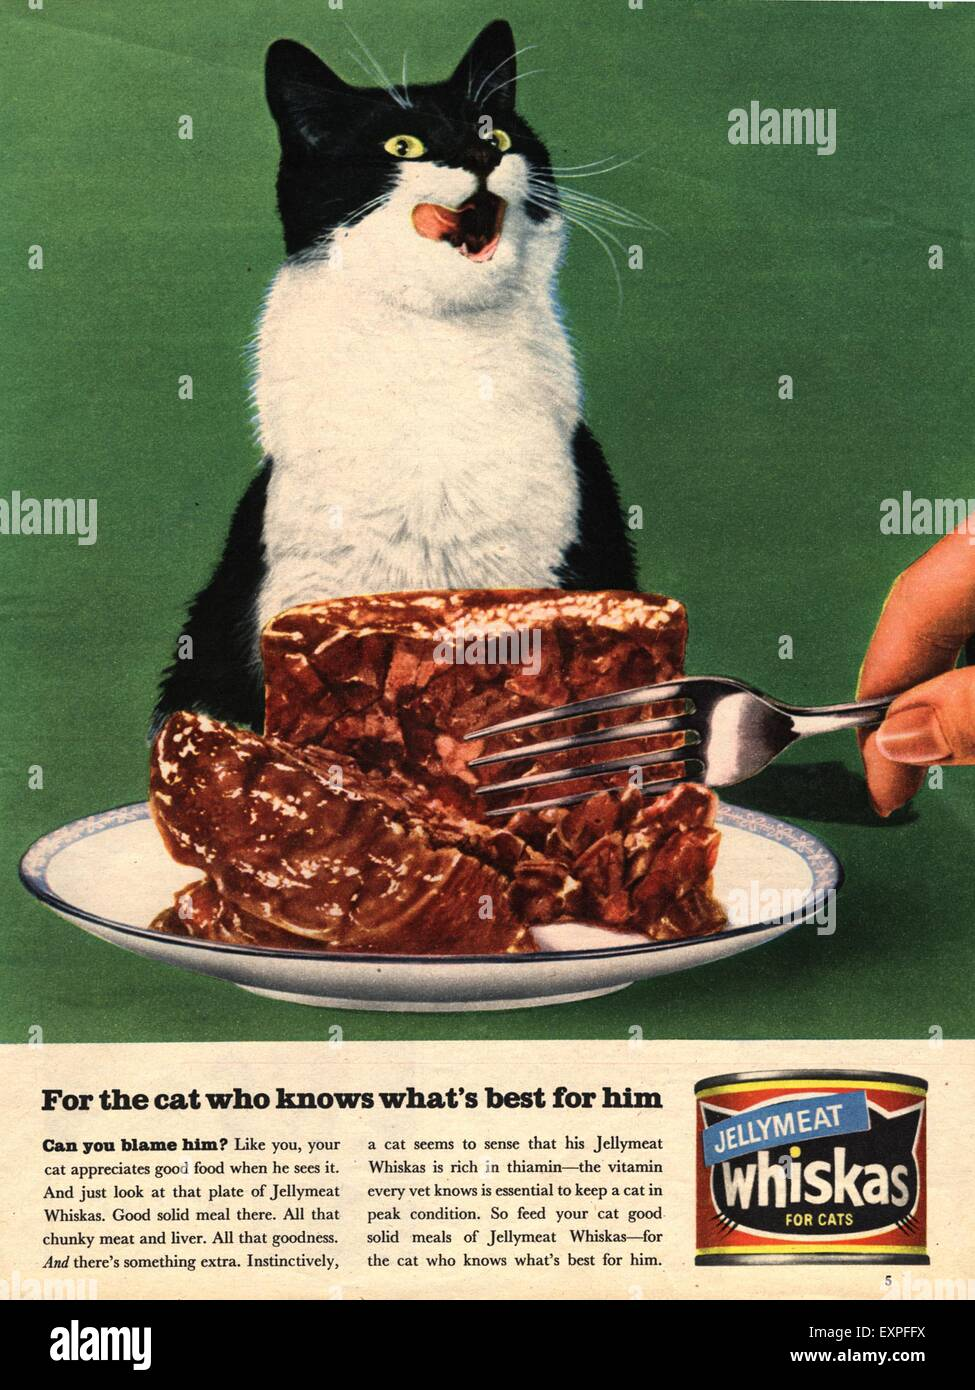
</div>

Gasoline blending is conceptually similar. We have a bunch of blendstocks with different costs and properties, and we have obligations to our customers to sell a final gasoline blend that meets product specifications (e.g. RVP, octane, sulfur content etc.)

In the next several sections, we'll see how DMC uses an LP steady-state optimizer to generate SS targets and how the calculated targets depend on the gain matrix and LP costs.